# Pymaceuticals Inc.
# Analysis
# Add your analysis here.

In [1]:
# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

C:\Users\nesto\AppData\Local\Temp\ipykernel_23420\2680071318.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [4]:
# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [5]:
#combine data into single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [6]:
#display data table for previou
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [7]:
# check for number of mice
num_unique_mice = len(merged_data['Mouse ID'].unique())

# Display the number of unique mice
print(f"Number of unique mice: {num_unique_mice}")


Number of unique mice: 249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoints
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"])]['Mouse ID'].unique()
print("Mouse ID with duplicate time points:", duplicate_mouse_id)

Mouse ID with duplicate time points: ['g989']


In [9]:
# Optional: Get all the data for the duplicate mouse ID

# Create a clean DataFrame by dropping the duplicate mouse by its ID
# Checking the number of mice in the clean DataFrame

cleaned_data = merged_data[merged_data["Mouse ID"] != duplicate_mouse_id[0]]
num_unique_mice_cleaned = len(cleaned_data["Mouse ID"].unique())
print("Updated number of unique mice IDs:", num_unique_mice_cleaned)

Updated number of unique mice IDs: 248


## Summary Statistics


In [10]:
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
5,a203,Infubinol,Female,20,23,25,56.793208,1
6,a203,Infubinol,Female,20,23,30,59.523197,1
7,a203,Infubinol,Female,20,23,35,61.931650,2
8,a203,Infubinol,Female,20,23,40,63.593490,2
9,a203,Infubinol,Female,20,23,45,67.973419,2


In [11]:
# generate summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
print(summary_statistics)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [12]:
# a more adv method to generate a summary statistics table of mean, median, variance, STD and
#SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem').reset_index()

In [13]:
#using the aggregation method, produce the same summary statistics in a single line
print(summary_statistics)

  Drug Regimen       Mean     Median   Variance  Standard_Deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.320930  50.446266  43.852013            6.622085  0.544332
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


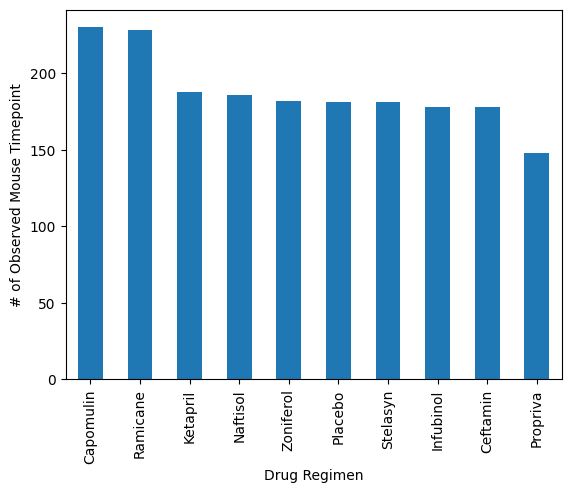

In [14]:
# generate bar plot showing total number of rows (Mouse ID/Timpepoints) for each drug regimen using Pandas
bar_chart_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.show()

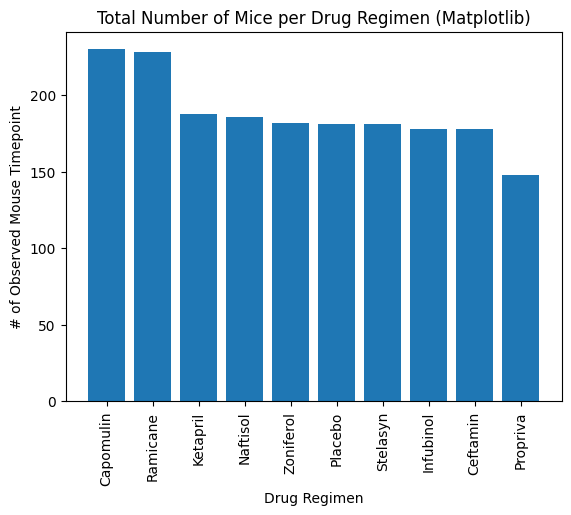

In [15]:
# generwate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
bar_chart_matplotlib = plt.bar(cleaned_data["Drug Regimen"].value_counts().index, cleaned_data["Drug Regimen"].value_counts())
plt.title('Total Number of Mice per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoint')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

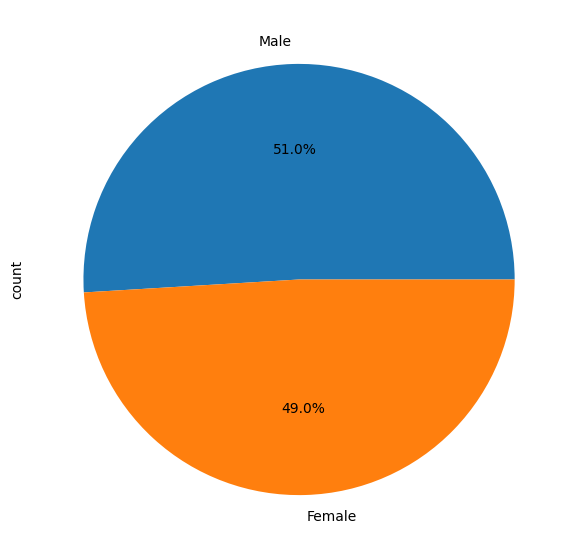

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(figsize=(7, 7))
cleaned_data["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%")

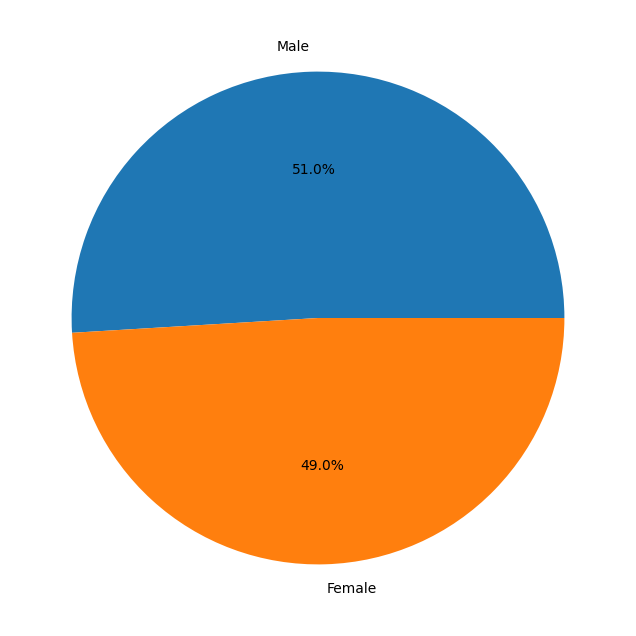

In [17]:
# generate a pie plot showing the distribution of female versus male mice using pyplot

data_counts = cleaned_data["Sex"].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
pie_chart_matplotlib = ax.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%')
plt.show()


## quartiles, outliers & boxplots


In [18]:
# calculate the final tumor volume of each mouse across four of the treatment regimens:
# capomulin, Ramicane, Infubinol, and Ceftamin
top_treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_treatment_data =cleaned_data[cleaned_data["Drug Regimen"].isin(top_treatments)]

In [19]:
# start by getting the last (greatest) timepoint for each mouse
final_timepoint_data = top_treatment_data.groupby("Mouse ID")["Timepoint"].max()

In [20]:
# merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(final_timepoint_data, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

In [21]:
# put treatments into a list for for loop (and later for plot labels)
treatments =cleaned_data["Drug Regimen"].unique()

# create empty list to fill with tumor vol data (for plotting)
tumor_vol_data =[]

# calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
# locate the rows which contain mice on each drug & get the tumor volumes
    tumor_vol = cleaned_data.loc[cleaned_data["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # determine outliers using upper & lower bound
    
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound =lower_q - 1.5*iqr
    upper_bound =upper_q + 1.5*iqr
    
    outliers =tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Potential outliers:{outliers}\n")

Treatment: Infubinol
IQR: 10.002090667500006
Potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Placebo
IQR: 12.457881529999995
Potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ceftamin
IQR: 9.593010457500007
Potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Stelasyn
IQR: 10.67215848
Potential outliers:965    75.12369
Name: Tumor Volume (mm3), dtype: float64

Treatment: Zoniferol
IQR: 10.616382797500002
Potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane
IQR: 8.325365415
Potential outliers:809    22.050126
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ketapril
IQR: 12.637963814999999
Potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Propriva
IQR: 9.597257012500002
Potential outliers:1115    71.172463
1116    72.455421
Name: Tumor Volume (mm3), dtype: float64

Treatment: Naftisol
IQR: 12.677160092499996
Po

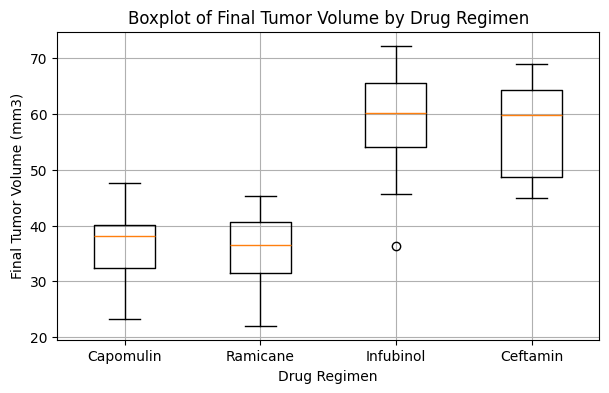

In [27]:
# generate a box plot that shows the dist. of the tumor volume for each of the treatment group

plt.figure(figsize=(7, 4))
plt.boxplot([final_tumor_volume_data[final_tumor_volume_data["Drug Regimen"]==regimen]["Tumor Volume (mm3)"] for regimen in top_treatments],
            labels=top_treatments)
plt.title("Boxplot of Final Tumor Volume by Drug Regimen")
boxprops = dict(color='red', linewidth=2)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(True)

plt.show()


# # Line and Scatter Plots


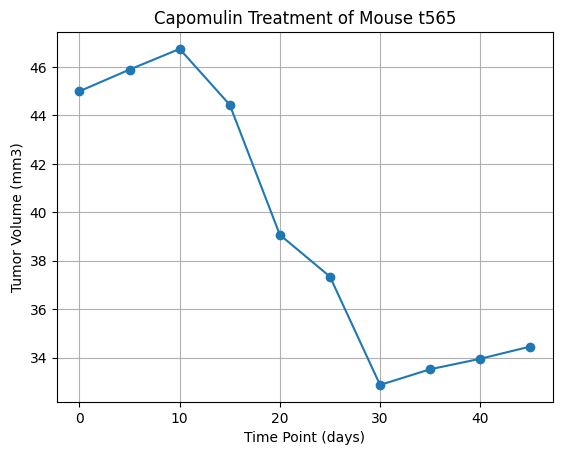

In [35]:
# generate a line plot of tumor vs time point for a single mouse treated with Capomulin

capomulin_mouse_id = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].sample().values[0]
capomulin_mouse_data = cleaned_data[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == capomulin_mouse_id)]

plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Capomulin Treatment of Mouse {capomulin_mouse_id}")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()



In [45]:
# generate a scatter plot of mouse weight vs. the average observed tumor value for the entire Capomulin reginmen

cleaned_data["Weight (g)"] = pd.to_numeric(cleaned_data["Weight (g)"], errors='coerce')
cleaned_data["Tumor Volume (mm3)"] = pd.to_numeric(cleaned_data["Tumor Volume (mm3)"], errors='coerce')
cleaned_data = cleaned_data.dropna(subset=["Weight (g)", "Tumor Volume (mm3)"])
capomulin_grouped = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

# scatter
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

NameError: name 'capomulin_grouped' is not defined